In [1]:
import pandas as pd
import numpy as np
import utm
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from math import radians, cos, sin, asin, sqrt  
from matplotlib import pyplot as plt

In [52]:
df1 = pd.read_csv('./data/GSM/new2gtest.csv')
df2 = pd.read_csv('./data/GSM/new2gtrain.csv')

In [53]:
for i in range(1,7):
    df1['RSSI_'+str(i)] = abs(df1['RSCP_'+str(i)] - df1['EcNo_'+str(i)])
    df2['RSSI_'+str(i)] = abs(df2['RSCP_'+str(i)] - df2['EcNo_'+str(i)])

In [54]:
df = df1.append(df2)

In [55]:
X = df.ix[:,[u'SRNCID', u'BestCellID', u'RSSI_1', u'RSSI_2', u'RSSI_3', u'RSSI_4', u'RSSI_5',u'RSSI_6']]

y__regressor = df[['Longitude','Latitude']]
y_classifier = df['GridID'] 

In [56]:
avg_reg = []
avg_cls = []
for i in range(0,11):
    X_train_regressor, X_test_regressor, y_train_regressor, y_test_regressor = train_test_split(X, y__regressor, test_size=0.2)
    X_train_classifier, X_test_classifier, y_train_classifier, y_test_classifier = train_test_split(X, y_classifier, test_size=0.2)
    reg = RandomForestRegressor(n_estimators=10)
    cls = RandomForestClassifier(n_estimators=10)
    reg.fit(X_train_regressor,y_train_regressor)
    cls.fit(X_train_classifier,y_train_classifier)
    y_rst_regressor = reg.predict(X_test_regressor)
    y_rst_classify = cls.predict(X_test_classifier)
    avg_reg.append(reg.score(X_test_regressor,y_test_regressor))
    avg_cls.append(cls.score(X_test_classifier,y_test_classifier))

In [57]:
reg_avg = np.average(avg_reg)
reg_cls = np.average(avg_cls)
reg_cls

0.63876898032501606

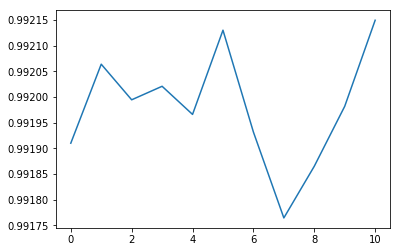

In [58]:
plt.plot(avg_reg)
plt.show()

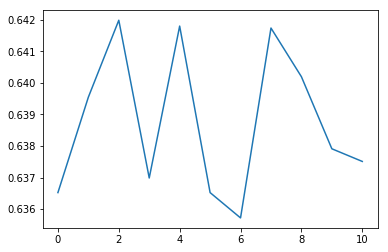

In [59]:
plt.plot(avg_cls)
plt.show()

In [60]:
X_train_regressor, X_test_regressor, y_train_regressor, y_test_regressor = train_test_split(X, y__regressor, test_size=0.2)
X_train_classifier, X_test_classifier, y_train_classifier, y_test_classifier = train_test_split(X, y_classifier, test_size=0.2)

In [61]:
reg = RandomForestRegressor(random_state=0, n_estimators=10)
cls = RandomForestClassifier(n_estimators=10)

In [62]:
reg.fit(X_train_regressor,y_train_regressor)
cls.fit(X_train_classifier,y_train_classifier)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [63]:
y_rst_regressor = reg.predict(X_test_regressor)
y_rst_classify = cls.predict(X_test_classifier)

In [64]:
y_train_regressor

,Longitude,Latitude
31135,121.491383,31.213967
43269,121.491287,31.214492
88597,121.478493,31.211188
26806,121.498005,31.216780
46584,121.496060,31.215468
67626,121.493595,31.211775
24057,121.493158,31.210408
30763,121.491385,31.213968
77925,121.496348,31.212500
37597,121.491238,31.216268


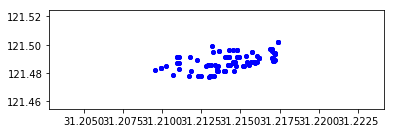

In [65]:
f1 = plt.figure(1)  
plt.subplot(211)  
plt.scatter(y_rst_regressor[0:100,1],y_rst_regressor[0:100,0],c='blue',s=15) 
plt.scatter(y_rst_regressor[0:100,1],y_rst_regressor[0:100,0],c='blue',s=15) 
plt.show()

In [66]:
reg.score(X_test_regressor,y_test_regressor)

0.9918984299333975

In [11]:
cls.score(X_test_classifier,y_test_classifier)

0.48789538787771691

In [67]:
mi = utm.from_latlon(df['Latitude'].min(), df['Longitude'].min())
ma = utm.from_latlon(df['Latitude'].max(),df['Longitude'].max())
width = ma[1] - mi[1]
height = ma[0] - mi[0]

In [68]:
gridCol = math.ceil(width/20)
gridRow = math.ceil(height/20)

In [69]:
def calcCenter(gridNum):
    drow = math.ceil(gridNum/gridCol)
    dcolumn = gridNum%gridCol
    center_x = mi[1] + dcolumn*20 - 10
    center_y = mi[0] + drow*20 - 10
    return [center_x, center_y]

In [70]:
center_ls = []
for i in range(len(y_rst_classify)):
    center = calcCenter(y_rst_classify[0])
    center_ls.append(utm.to_latlon(center[1],center[0],mi[2],mi[3]))

In [71]:
center_ls = np.array(center_ls)

In [72]:
y_test_regressor.index = range(0,len(y_test_regressor))

In [73]:
y_rst_regressor = pd.DataFrame(y_rst_regressor,columns=['Pre_Longitude','Pre_Latitude'])
center_ls = pd.DataFrame(center_ls,columns=['Pre_Latitude','Pre_Longitude'])

In [74]:
reg_eval = pd.concat([y_test_regressor,y_rst_regressor],axis=1)
cls_eval = pd.concat([y_test_regressor,center_ls],axis=1)

In [75]:
def haversine(lon1, lat1, lon2, lat2): 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])  
  
    dlon = lon2 - lon1   
    dlat = lat2 - lat1   
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2  
    c = 2 * asin(sqrt(a))   
    r = 6371 
    return c * r * 1000  

In [76]:
reg_ls = []
cls_ls = []
for i in range(0,len(reg_eval)):
    dis_reg = haversine(reg_eval.loc[i,"Longitude"],reg_eval.loc[i,"Latitude"],
                       reg_eval.loc[i,"Pre_Longitude"],reg_eval.loc[i,"Pre_Latitude"])
    dis_cls = haversine(cls_eval.loc[i,"Longitude"],cls_eval.loc[i,"Latitude"],
                       cls_eval.loc[i,"Pre_Longitude"],cls_eval.loc[i,"Pre_Latitude"])
    reg_ls.append(dis_reg)
    cls_ls.append(dis_cls)

In [77]:
reg_ls.sort()
cls_ls.sort()

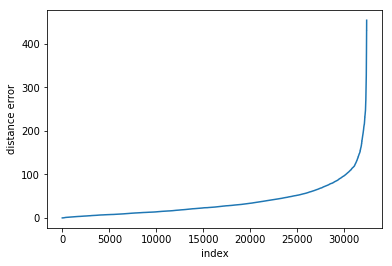

In [78]:
plt.plot(reg_ls)
plt.xlabel("index")
plt.ylabel("distance error")
plt.show()

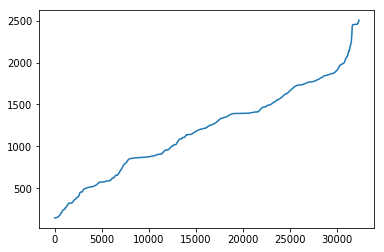

In [80]:
plt.plot(cls_ls)
plt.show()